In [1]:
from models.stylegan2 import StyleGAN2Generator, StyleGAN2Model
from models.encoders import IR_50, IR_SE_50, DirectionModel
from configs.paths_config import dataset_paths, model_paths

import torch
import torch.nn as nn 
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path 

StyleGAN2: Optimized CUDA op FusedLeakyReLU not available, using native PyTorch fallback.
StyleGAN2: Optimized CUDA op UpFirDn2d not available, using native PyTorch fallback.


In [ ]:
model_path = "pretrained/550000.pt"
generator = StyleGAN2Generator(model_path=model_path, truncation=0.7, use_w=True, feature_layer="conv1", resolution=256)
generator.eval();

In [ ]:
ckpt = torch.load("pretrained/550000.pt")
generator = StyleGAN2Model()

In [3]:
ckpt = torch.load(model_path, map_location="cpu")
ckpt.keys()

dict_keys(['g', 'd', 'g_ema', 'g_optim', 'd_optim'])

In [3]:
dir_model = DirectionModel(3, 512, 3, alpha=0.1)
dir_model.eval();

In [4]:
z = generator.sample_latent(1)
with torch.no_grad():
    orig_imgs = generator(z)

In [5]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = TF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

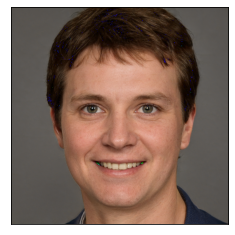

In [6]:
grid = make_grid(orig_imgs)
show(grid)

In [8]:
z = dir_model(z)
z_s = torch.chunk(z, 3, 0)

In [10]:
print(len(z_s))

3


In [9]:
print(z_s[0].size())

torch.Size([1, 512])


In [10]:
imgs = []
for z_d in z_s:
    img = generator(z_d)
    imgs.append(img)

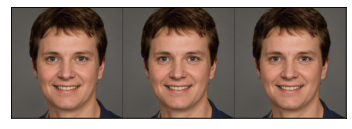

In [12]:
imgs = torch.cat(imgs, dim=0)
grid = make_grid(imgs)
show(grid)